In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


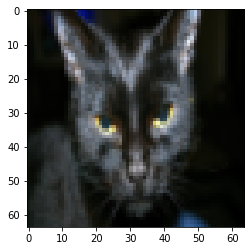

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [4]:
print ("Each image is of size:",train_set_x_orig.shape)

Each image is of size: (209, 64, 64, 3)


In [5]:
print('m_train (number of training examples) are: ', train_set_x_orig.shape[0])
print('m_test (number of test examples) are: ', test_set_x_orig.shape[0])
print('num_px (= height = width of a training image): ',train_set_x_orig.shape[1])

m_train (number of training examples) are:  209
m_test (number of test examples) are:  50
num_px (= height = width of a training image):  64


In [6]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [7]:
#Flatten the arrays( with shape (64*64*3, num of samples))
X_trainflatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
X_testflatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 

print("flattened train set X shape:" , X_trainflatten.shape)
print("flattened train set Y shape:" , train_set_y.shape)
print("flattened test set X shape:" , X_testflatten.shape)
print("flattened test set Y shape:" , test_set_y.shape)

flattened train set X shape: (12288, 209)
flattened train set Y shape: (1, 209)
flattened test set X shape: (12288, 50)
flattened test set Y shape: (1, 50)


In [8]:
#Let's standardize our dataset.
Xtrain = X_trainflatten/255
Xtest = X_testflatten/255

**Key steps**:
In this part, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

In [9]:
#Step 1

def sigmoid(z):
    return 1/(1+np.exp(-z))


In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [11]:
#Step 2

def initialize_parameters(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [12]:
dim = 2
w, b = initialize_parameters(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [13]:
#Step 3 Forward and Backward Propogation


def loss_func(Y,a):
    L = Y * (np.log(a)) + (1-Y)*(np.log(1-a))
    return L
    
def cost_func(L,m):
    J= (-1/m)* np.sum(L)
    J= np.squeeze(J)
    return J
    
def forward_propagation(w,X,b):
    z = np.dot(w.T,X) + b
    a = sigmoid(z)
    return(a)
    

def backward_propagation(a,Y,X,m):
    dz= a-Y
    dw = (1/m)*np.dot(X,dz.T)
    db = (1/m)*np.sum(dz)
    return dw,db
    
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = forward_propagation(w,X,b)
    cost = cost_func(loss_func(Y,A),m)
    dw,db = backward_propagation(A,Y,X,m)
    return dw,db,cost

In [14]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
dw,db, cost = propagate(w, b, X, Y)
print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [15]:
# Step 4 Optimization

In [16]:
def optimization(w, b, X, Y, num_iterations, alpha, print_cost=False):
    costs=[]
    for i in range(num_iterations):
        dw ,db, cost = propagate(w, b, X, Y)
        w -= alpha*dw
        b -= alpha*db
        
        if i%100 == 0:
            costs.append(cost)
            if print_cost:
                print("cost after every 100th iteration is:",(i,cost))
        
    return dw, db, w, b, costs

In [17]:
dw,db,w,b,costs = optimization(w, b, X, Y, num_iterations= 100, alpha = 0.009, print_cost = False)

print ("w = " + str(w))
print ("b = " + str(b))
print ("dw = " + str(dw))
print ("db = " + str(db))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [18]:
#Step 5 Prediction

In [19]:
def Predict(w,b,X):
    Ycap = sigmoid(np.dot(w.T, X)+b)
    return np.where(Ycap>0.5,1,0)  


In [20]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(Predict(w, b, X)))

predictions = [[1 1 0]]


In [21]:
Xtrain.shape

(12288, 209)

In [22]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, alpha = 0.5, print_cost = False):
    
    w,b = initialize_parameters(Xtrain.shape[0])
    dw, db, w, b, costs = optimization(w, b, Xtrain, train_set_y, num_iterations, alpha, print_cost)
    
    # Plot learning curve (with costs)
    plt.plot(range(0,num_iterations,100), costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    Y_prediction_train = Predict(w,b, Xtrain)
    Y_prediction_test = Predict(w, b, Xtest)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_iterations}
    
    return d

cost after every 100th iteration is: (0, 0.6931471805599453)
cost after every 100th iteration is: (100, 0.5845083636993086)
cost after every 100th iteration is: (200, 0.46694904094655476)
cost after every 100th iteration is: (300, 0.37600686694802077)
cost after every 100th iteration is: (400, 0.3314632893282513)
cost after every 100th iteration is: (500, 0.30327306747438293)
cost after every 100th iteration is: (600, 0.2798795865826048)
cost after every 100th iteration is: (700, 0.26004213692587574)
cost after every 100th iteration is: (800, 0.24294068467796623)
cost after every 100th iteration is: (900, 0.22800422256726066)
cost after every 100th iteration is: (1000, 0.21481951378449635)
cost after every 100th iteration is: (1100, 0.20307819060644985)
cost after every 100th iteration is: (1200, 0.1925442771670686)
cost after every 100th iteration is: (1300, 0.18303333796883503)
cost after every 100th iteration is: (1400, 0.17439859438448876)
cost after every 100th iteration is: (1500

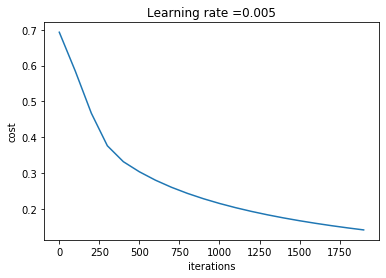

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [23]:
d = model(Xtrain, train_set_y, Xtest, test_set_y, num_iterations = 2000, alpha = 0.005, print_cost = True)

**Comment**: Training accuracy is close to 100%. This is a good sanity check: the model is working and has high enough capacity to fit the training data. 
Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier.

Also, we see that the model is clearly overfitting the training data. We can also work on learning how to reduce overfitting, for example by using regularization.

**Interpretation**:
We can see the cost decreasing. It shows that the parameters are being learned. However, we also see that we could train the model even more on the training set. 
We can try to increase the number of iterations in the cell above and rerun the cells. We might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

y = 0.45098039215686275, you predicted that it is a "cat" picture.


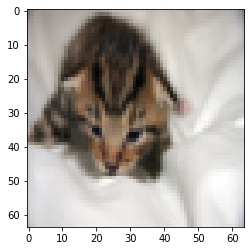

In [24]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(Xtest[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(Xtest[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

## 6 - Further analysis

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates

learning rate is: 0.05, Number of iterations: 1500


C:\Users\IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


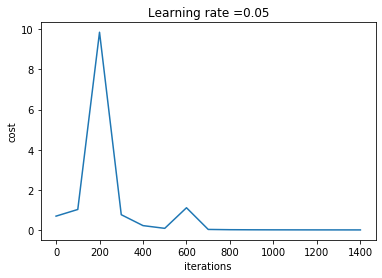

train accuracy: 100.0 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.01, Number of iterations: 2000


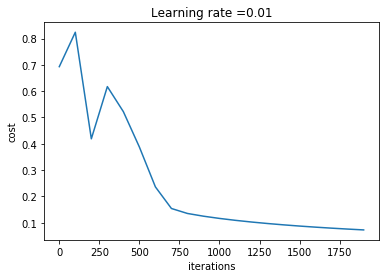

train accuracy: 99.52153110047847 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.005, Number of iterations: 2500


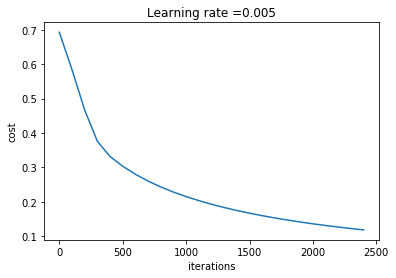

train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001, Number of iterations: 3000


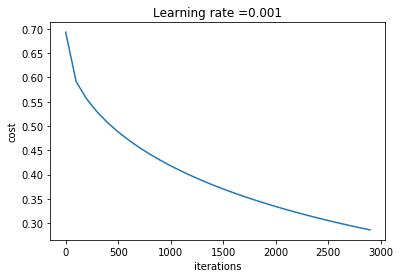

train accuracy: 93.77990430622009 %
test accuracy: 74.0 %

-------------------------------------------------------

learning rate is: 0.0005, Number of iterations: 3500


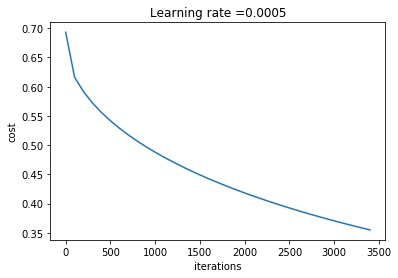

train accuracy: 90.9090909090909 %
test accuracy: 66.0 %

-------------------------------------------------------

learning rate is: 0.0001, Number of iterations: 4000


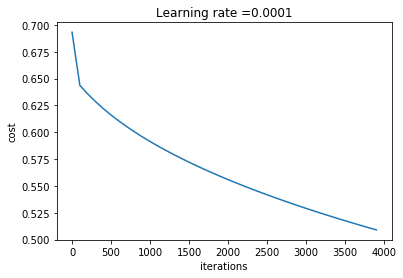

train accuracy: 74.16267942583733 %
test accuracy: 56.0 %

-------------------------------------------------------



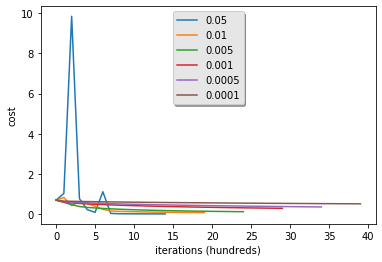

In [28]:
lr_and_numiter = [(0.05,1500), (0.01,2000),(0.005,2500),(0.001,3000),(0.0005,3500),(0.0001,4000)]
models = {}
for i in range(len(lr_and_numiter)):
    alpha = lr_and_numiter[i][0]
    num_iterations=lr_and_numiter[i][1]
    print ("learning rate is: " + str(alpha) + ", Number of iterations: "+ str(num_iterations))
    models[str(i)] = model(Xtrain, train_set_y, Xtest, test_set_y, num_iterations = num_iterations, alpha = alpha, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in range(len(lr_and_numiter)):
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- Also with different learning rates we have increased the number of iterations as with lower learning rate it may take more time by the model to learn
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 
